In [2]:
# Import the libraries
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import tweepy
import json
import pandas as pd
import csv
import re #regular expression
from textblob import TextBlob
import string
import preprocessor as p
import os
import time
from nltk.corpus import stopwords
from textblob import TextBlob

In [3]:
def info_txt(data,text):

# on compte le nombre de mot en majuscule 
#la colère ou la rage s’exprime assez souvent en écrivant en lettres MAJUSCULES,
# ce qui en fait une opération indispensable pour identifier ces mots.
    data['upper_wrd_cnt'] = data[text].apply(lambda x: len([x for x in x.split() if x.isupper()]))
# on compte le nombre de mot: des fois des phrases courtes expriment un truc bref un énervement    
    data['word_count'] = data[text].apply(lambda x: len(str(x).split(" ")))

    return data

In [4]:
import re
#Les tweets sont des objets très sales !,Le nettoyage des tweets comprendra plusieurs choses :
#Enlever les emojis 
#Retirer la ponctuation 
#Retirer les caractères spéciaux  
#Retirer les chiffres 
#Changer les lettres majuscules en minuscules
def nlp_pipeline(text):

    text = text.lower()
    text = text.replace('\n', ' ').replace('\r', '')
    text = ' '.join(text.split())
    text = re.sub(r"[A-Za-z\.]*[0-9]+[A-Za-z%°\.]*", "", text)
    text = re.sub(r"(\s\-\s|-$)", "", text)
    text = re.sub(r"[,\!\?\%\(\)\/\"]", "", text)
    text = re.sub(r"\&\S*\s", "", text)
    text = re.sub(r"\&", "", text)
    text = re.sub(r"\+", "", text)
    text = re.sub(r"\#", "", text)
    text = re.sub(r"\$", "", text)
    text = re.sub(r"\£", "", text)
    text = re.sub(r"\%", "", text)
    text = re.sub(r"\:", "", text)
    text = re.sub(r"\@", "", text)
    text = re.sub(r"\-", "", text)
    text = re.sub(r"\_", "", text)
    text = re.sub(r"rt ", "", text)
    

    return text

In [5]:
# Clés de votre application
consumer_key = "dO73ZQhKgX2mA9qAER6cVmVDT"
consumer_secret = "YVjmIYiXpqRpRupVGCP4p6QzbA08lU4ihnhombPsn89KEM8rh4"

# le access_token est le token de l'application twitter que nous avons créée précédement
access_token = "1187541216-lgbnWetMfPJNP8BgiDOiBGwRNJCvLBGcuHfuurg"
access_token_secret = "Y2r7pWLWMgvQgSh0EmdD0Imts4lPMLvQYq1SDYvFZuJ2H"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [7]:
text_query=input('Entrez un ou des paramètres de recherche tel que les mots clés et les hashtags: ')
language = input('Entrez la langue dans laquelle vous voulez vos tweets : ')
count= input('Entrez le nombre de tweets à tirer par exécution : ')
count=float(count) 
try:
 # Creation of query method using parameters
 tweets = tweepy.Cursor(api.search,q=text_query,lang=language).items(count)
 # Pulling information from tweets iterable object
 tweets_list = [[tweet.user.screen_name,tweet.user.description,tweet.user.location,tweet.user.friends_count,tweet.user.followers_count,
                 tweet.user.statuses_count,tweet.created_at,tweet.retweet_count,
                 tweet.entities, tweet.id, tweet.text] for tweet in tweets]
 
 # Creation of dataframe from tweets list
 # Add or remove columns as you remove tweet information

 tweets_df = pd.DataFrame(tweets_list,columns = ['username', 'acctdesc', 'location', 'following',
                                        'followers', 'totaltweets', 'tweetcreatedts',
                                        'retweetcount','hashtags','id' ,'text' ])
 #tweets_df = pd.DataFrame(tweets_list)
 
except BaseException as e:
    print('failed on_status,',str(e))
    time.sleep(3)
info_txt(tweets_df,'text')
tweets_df['text_clean'] = tweets_df['text'].apply(nlp_pipeline)
tweets_df['text_clean'].apply(lambda x: str(TextBlob(x).correct()))
tweets_df['sentiment']=tweets_df ['text_clean'].apply (lambda x: TextBlob (x) .sentiment[0])
tweets_df['subjectivity']=tweets_df ['text_clean'].apply (lambda x: TextBlob (x) .sentiment[1])
tweets_df

Entrez un ou des paramètres de recherche tel que les mots clés et les hashtags: #Covid_19
Entrez la langue dans laquelle vous voulez vos tweets : fr
Entrez le nombre de tweets à tirer par exécution : 300


,username,acctdesc,location,following,followers,totaltweets,tweetcreatedts,retweetcount,hashtags,id,text,upper_wrd_cnt,word_count,text_clean,sentiment,subjectivity
0,Jean_Pailler,Ecrit après avoir vécu. Né au Maroc de parents...,Uzès,38,18,119,2021-01-27 15:16:41,202,"{'hashtags': [], 'symbols': [], 'user_mentions...",1354448249327915011,RT @Portes_Thomas: « Le vaccin devrait être un...,1,23,portesthomas « le vaccin devrait être un bien ...,0.00,0.0
1,tical10,I can't keep calm Μαλακά I'm Greek \nhttps://t...,Sur terre. #BlackLivesMatter,1193,351,29724,2021-01-27 15:16:36,158,"{'hashtags': [{'text': 'Covid_19', 'indices': ...",1354448228083781632,RT @ComplotsFaciles: Il faut arrêter de dramat...,1,20,complotsfaciles il faut arrêter de dramatiser ...,0.00,0.0
2,BrunetJeanmarc7,Opposé à tous les Totalitarismes\nA ne plus cr...,,216,53,2329,2021-01-27 15:16:34,202,"{'hashtags': [], 'symbols': [], 'user_mentions...",1354448218290069505,RT @Portes_Thomas: « Le vaccin devrait être un...,1,23,portesthomas « le vaccin devrait être un bien ...,0.00,0.0
3,RetraiT_Taxai,#DégagezEnMarche\n#HalteAuPrivilegePress\n#Ave...,http://compte-a-rebours-emmanu,923,687,83564,2021-01-27 15:15:52,26,"{'hashtags': [{'text': 'vaccinations', 'indice...",1354448042196410370,RT @AdeSouzy: Du coup vous assumez la responsa...,2,21,adesouzy du coup vous assumez la responsabilit...,-0.05,0.4
4,Nat94227508,Baller/24/🐍/🏈,,57,1,31,2021-01-27 15:15:31,2122,"{'hashtags': [{'text': 'covid', 'indices': [56...",1354447953604304900,RT @MatMonde_: Type d'agression en augmentatio...,1,10,matmonde type d'agression en augmentation avec...,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,CollineBrune,Professeur d'anglais /\nAmerican in Paris /\nW...,,409,25,500,2021-01-27 13:52:53,388,"{'hashtags': [{'text': 'LaStrategieBlanquer', ...",1354427161424384006,"RT @AllanBARTE: La ""stratégie Blanquer"" face a...",4,15,allanbarte la stratégie blanquer face au covid...,0.00,0.0
296,Thierry_Bes,Directeur de la Communication chez @Ellisphere,"Nanterre, France",102,159,3870,2021-01-27 13:52:52,1,"{'hashtags': [{'text': 'Covid_19', 'indices': ...",1354427157129424896,RT @ellisphere: #Covid_19 : plus de 50 % des e...,1,22,ellisphere covid plus de des entreprises du...,0.00,0.0
297,haddad_adil,"Originaire de Montpellier, mes tweets s'engage...","Montpellier, France",181,52,2103,2021-01-27 13:52:51,0,"{'hashtags': [{'text': 'Covid_19', 'indices': ...",1354427152641499140,« Marre du #Covid_19 » : de confinements en co...,0,22,« marre du covid » de confinements en couvref...,0.00,0.0
298,SpendOfTheTime,Ton étudiante en psychologie préférée,"Besançon, France",150,71,3443,2021-01-27 13:52:37,1,"{'hashtags': [{'text': 'COVID_19', 'indices': ...",1354427090750353412,RT @Arno_Carre: #COVID_19 Le gouvernement étud...,2,20,arnocarre covid le gouvernement étudie plusieu...,0.00,0.0


In [8]:
tweets_df.loc[tweets_df['sentiment']==max(tweets_df['sentiment']),:]


,username,acctdesc,location,following,followers,totaltweets,tweetcreatedts,retweetcount,hashtags,id,text,upper_wrd_cnt,word_count,text_clean,sentiment,subjectivity
229,blackmannproud,,"Bordeaux, France",643,208,1575,2021-01-27 14:08:37,0,"{'hashtags': [{'text': 'Covid_19', 'indices': ...",1354431120092393475,"Bon je suis contact Covid, je ne peux plus sor...",0,18,bon je suis contact covid je ne peux plus sort...,0.8,0.7


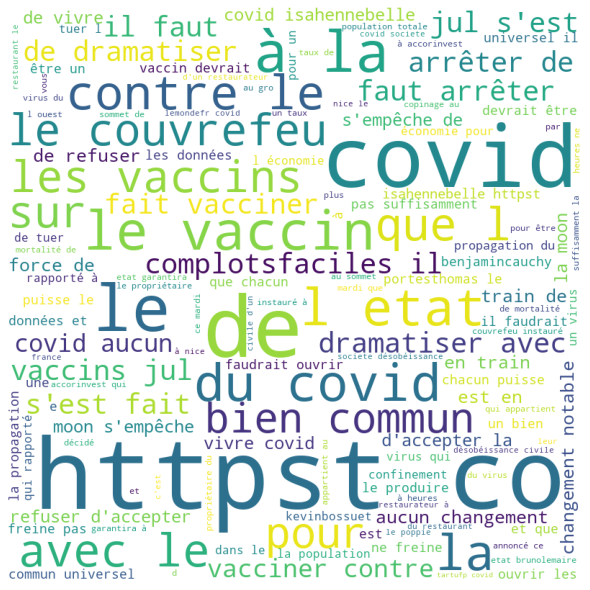

In [9]:
# Python program to generate WordCloud 
  
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
  

  
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in tweets_df.text_clean: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 
